<a href="https://colab.research.google.com/github/DataBoss62/BASICS-TUTORIAL/blob/main/Vgsales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your candidate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [29]:
# Reading in vgsales.csv file

# import all the libraries and modules required

import pandas as pd # data processing
import numpy as np # maths

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sns.set()

data = pd.read_csv('https://raw.githubusercontent.com/DataBoss62/BASICS-TUTORIAL/main/vgsales%20(1).csv', header=0 )
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [31]:
# Mostly complete data, some null values in 'Year' and 'Publisher' columns.

# Rank - Ranking of overall sales, integer
# Name - Name of Game, object
# Platform - Platform of the games release (xbox, PS2), object
# Year - Year of the game's release, float
# Genre - Genre of the game(Action, Sport),object
# Publisher - Publisher of the game (Nintendo, Sony), object
# NA_Sales - Sales in North America (M units), float
# EU_Sales - Sales in Europe (M units), float
# JP_Sales - Sales in Japan M units), float
# Other_Sales - Sales in the rest of the world (M units), float
# Global_Sales - Total worldwide sales M units), float

In [32]:
# list number of null values per column. 271 in 'Year' and 58 in 'Publisher'. Relatively small numbers given 16598 entries.
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Q. Define the problem domain

In [ ]:
# What is the best selling genre 

### Q. Identify candidate questions for your machine learning project

In [33]:
# value_counts
# discrete or continuous numbers
# what is label, what columns should be evaluated to become 
# features, Dimensions, Variables
# 
# can i use the dataset as-is or does it need cleaning?



### Q. Generate a descriptive statistics report for the columns in your dataset

In [34]:
# cardinality - count of unique values in a column
for cname in data.columns:
  print(cname + " : " + str(data[cname].value_counts().count()))

Rank : 16598
Name : 11493
Platform : 31
Year : 39
Genre : 12
Publisher : 578
NA_Sales : 409
EU_Sales : 305
JP_Sales : 244
Other_Sales : 157
Global_Sales : 623


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [ ]:
# Note, data spans from 1980 to 2020 covering 38 years. There are 12 genres, 31 platforms and 578 publishers and 16598 rankings.
# Max global sales were 82.74 million units.

In [36]:
px.histogram(data, x='Year')
# histogram below shows the number of games launched by year. there was a peak from 2007 to 2011.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

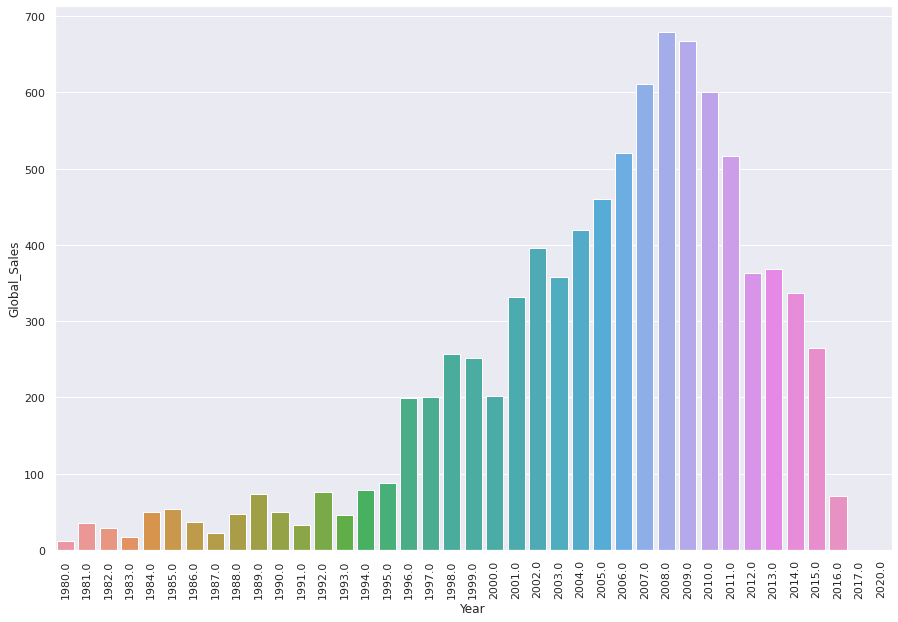

In [37]:
# the chart below plots global sales by year. There is a strong correlation between the year of launch of the game and it's global sales figures.
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
#data_year.head(40)


In [38]:
px.histogram(data, x='Platform')
# histogram below shows number of games launched by platform. Top 7 platforms(by no.of games) are DS, PS2, PS3, Wii, X360, PSP and PS

In [39]:
px.histogram(data, x='Genre')
# Histogram below shows the top 7 genres (by games lauched) -> Action, Sports, Misc, Role-Playing, Shooter, Racing, Adventure

In [40]:
fig = px.pie(data, values='Global_Sales', names='Platform', title='Global Sales by Platform')
fig.show()
# Shows dominance of the PS2 ,Xbox360, PS3, Wii and DS platforms

In [41]:
fig = px.pie(data, values='NA_Sales', names='Platform', title='NA Sales by Platform')
fig.show()
# in North America Xbox360 rules

In [42]:
fig = px.pie(data, values='EU_Sales', names='Platform', title='Europe Sales by Platform')
fig.show()

In [43]:
fig = px.pie(data, values='JP_Sales', names='Platform', title='Japan Sales by Platform')
fig.show()

In [62]:
fig = px.pie(data, values='Other_Sales', names='Platform', title='Other Sales by Platform')
fig.show()

In [ ]:
# The graphs above show us the top platforms preferred by users in different regions. We observe the following:

# X360 (Microsoft) is the top preferred console by users in North America making a total of 601.05 million.
# PS3 (Sony) is the top preferred console by users in Europe making a total of 343.71 million.
# DS (Nintendo) is the top preferred console by users in Japan making a total of 175.57 million.
# PS2 (Sony)  is the top preferred console by users in other regions making a total of 193.44 million.
# 

In [44]:
fig = px.pie(data, values='Global_Sales', names='Genre', title='Global Sales by Genre')
fig.show()

In [45]:
total_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(total_sale_reg.sum(), columns=['a', 'b'])
total_sale_reg = total_sale_reg.sum().reset_index()
total_sale_reg = total_sale_reg.rename(columns={"index": "region", 0: "sale"})
total_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [46]:
# Pie chart below shows NA having 49.3 % of all sales and Europe 27.3% , Japan 14.5%. Market dominated by NA. 77% of games market dominated by NA and Europe.
fig = px.pie(total_sale_reg, values='sale', names='region', title='Total Sales by Region')
fig.show()

In [59]:
data_game = data.groupby(by=['Name'])['Global_Sales'].sum()  # top selling games of all time
data_game = data_game.reset_index()
data_game = data_game.sort_values(by=['Global_Sales'], ascending=False)
data_game = data_game.head(20)

dg_NA = data.groupby(by=['Name'])['NA_Sales'].sum()     # top selling NA games of all time
dg_NA = dg_NA.reset_index()
dg_NA = dg_NA.sort_values(by=['NA_Sales'], ascending=False)
dg_NA = dg_NA.head(20)

dg_JP = data.groupby(by=['Name'])['JP_Sales'].sum()    # top selling JP sales of all time
dg_JP = dg_JP.reset_index()
dg_JP = dg_JP.sort_values(by=['JP_Sales'], ascending=False)
dg_JP = dg_JP.head(20)

dg_EU = data.groupby(by=['Name'])['EU_Sales'].sum()    # top selling EU sales of all time
dg_EU = dg_EU.reset_index()
dg_EU = dg_EU.sort_values(by=['EU_Sales'], ascending=False)
dg_EU = dg_EU.head(20)

In [48]:
# top 20 games of all time
fig = px.pie(data_game, values='Global_Sales', names='Name', title='Top 20 games of all time')
fig.show()

In [57]:
# top 20 NA games of all time

fig = px.pie(dg_NA, values='NA_Sales', names='Name', title='Top 20 North America games ')
fig.show()

In [56]:
# top 20 JP games of all time

fig = px.pie(dg_JP, values='JP_Sales', names='Name', title='Top 20 Japan games ')
fig.show()

In [60]:
# top 20 EU games of all time

fig = px.pie(dg_EU, values='EU_Sales', names='Name', title='Top 20 Europe games ')
fig.show()

In [ ]:
# The Game pie charts above show regional favourites:

# North America : Wii Sports and Super Mario Bros  (Tetris no 4)
# Europe : Mario Kart and FiFA (no Tetris but several FIFA games)
# Japan : Pokemon and Super Mario Bros (several Pokemons, Tetris no 6)

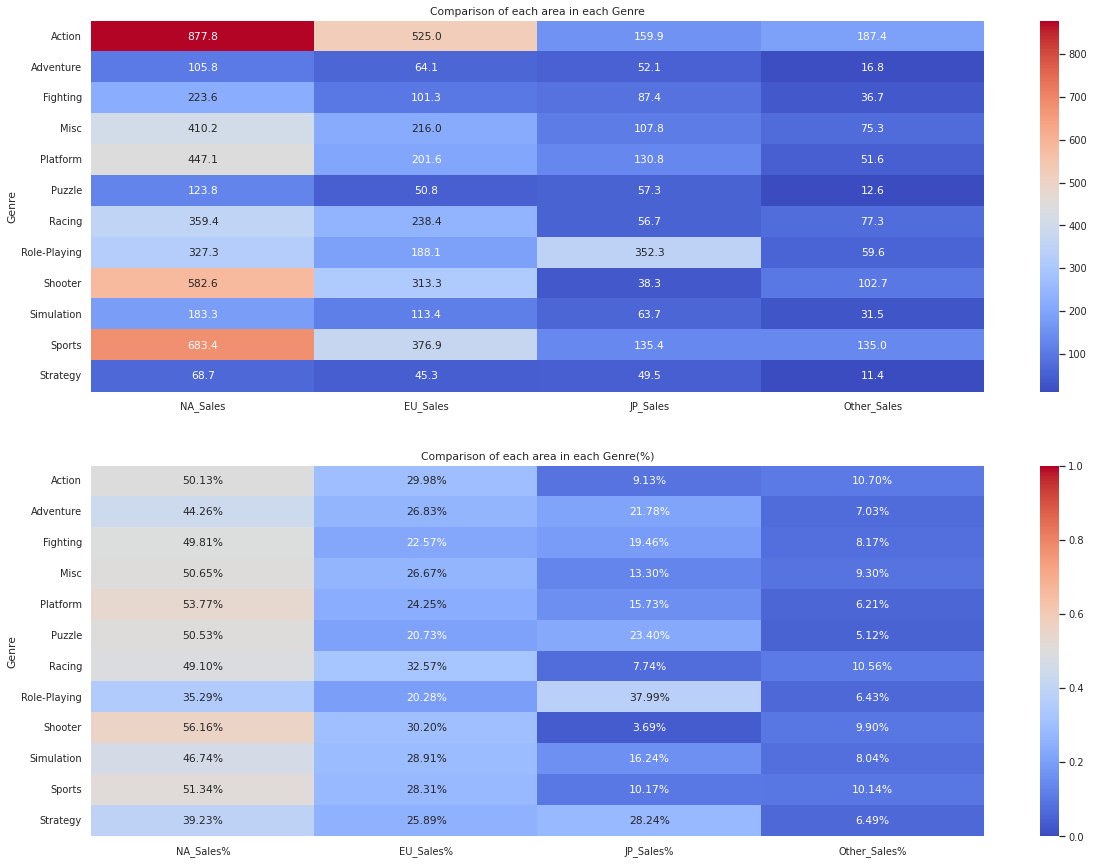

In [99]:
GenreGroup = data.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']
plt.figure(figsize=(20, 15))
sns.set(font_scale=0.9)
plt.subplot(211)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True,cmap = 'coolwarm', fmt = '.1f')
plt.title("Comparison of each area in each Genre")
plt.subplot(212)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True,cmap = 'coolwarm', fmt = '.2%')
plt.title("Comparison of each area in each Genre(%)")
plt.show()

# First Heatmap below show the dominance of the Action and Sports genre in all region sales.
# Second heatmap shows for any specific genre, which region has the highest % sell. 
# Japan's highest share of a genre is in Role-Playing
# NA 's highest share of a genre is in Shooter
# EU's highest share of a genre is in Racing (but less than NA)
# Other region's highest share of a genre is in Action



In [82]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05


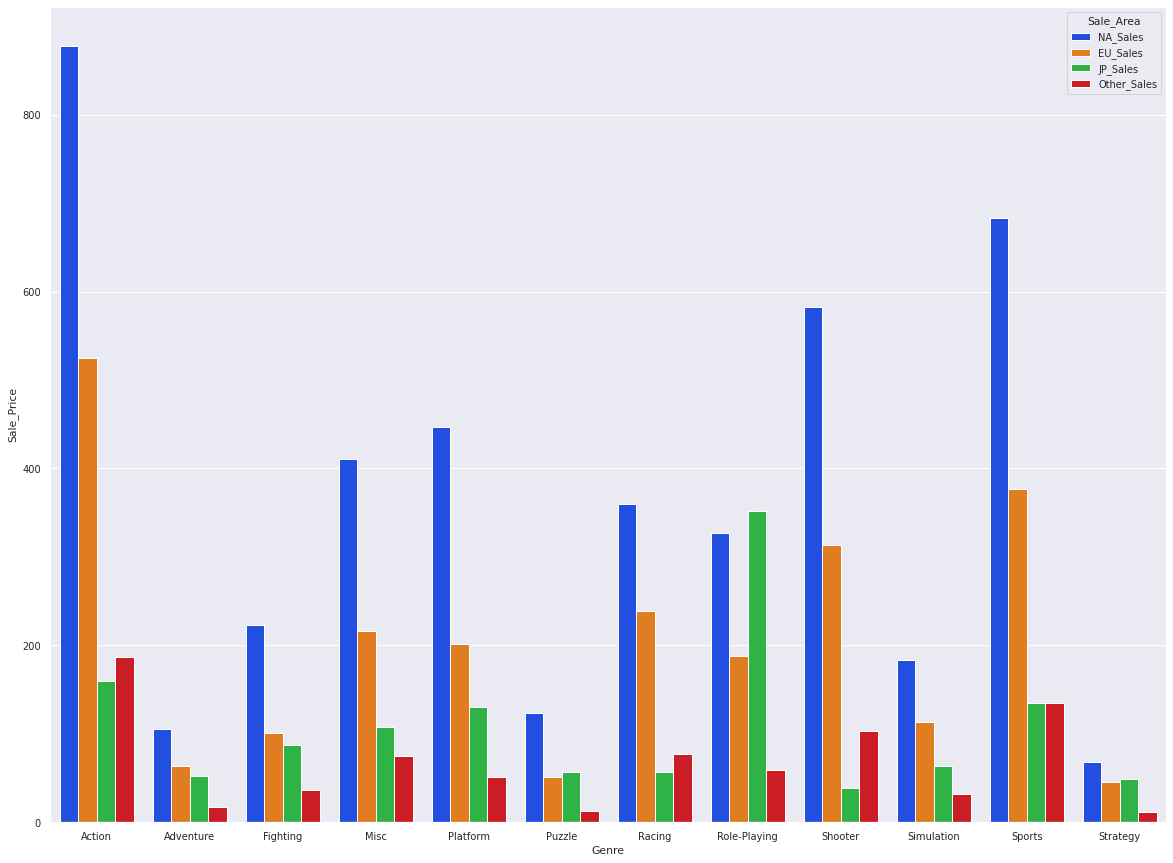

In [97]:
# Bar plot below shows the total global sales of  top 12 genres by region.
# Note: (1) Action, Sports, Shooter genres as top sellers
#       (2) Role-Playing popular in Japan.
#       (3) Racing popular in Europe

plt.figure(figsize=(20, 15))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table, palette = 'bright')


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
data.info()

Q. Is there any correlation in the data? How would you decide which columns to keep?

In [ ]:
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6

Q. Is there any imbalance in the label
?

In [ ]:
# LABEL COLUMN-> Y/value you want to predict
# diagnosis column from bca
data['diagnosis'].value_counts()
# Cat = 100, Parrot= 50, Ant= 5
# either no action action required or just del extra rows!

# if one class is less than quarter of the other class,
# the data is imbalanced!
#
# Regression- NO ACTION REQUIRED. 
# Classification (LABEL/Y) - Diagnosis
# 1) Del some of the rows of the larger dataset 
# 2) OR generate FAKE/SIMULATED data 
# 3) Ignore if you want to take a leap of faith in the model

Q. Are there any outliers in the dataset? What do you do with them?

In [ ]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore

# Detecting Frauds, Anomalies 

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

In [ ]:
# One hot encoding-> pandas-> get_dummies 

# data['diagnosis'] - get_dummies


# if there are too many values-> one-hot encoding is NOT an option

# GROUP_BY on ZIP_code or country or state!
# or del that column altogether!

# One Hot encoding

# Sales City Profit
#  100.  London  20
#. 100.  Papua.  60
#  123.  London. 21
#. 65.   Paris.  13
#. 92.   Bandar Seri Begawan 22

# 2 kinds of ML problems- 
# 1) i can use city as a filter and generate multiple models
# one for each city

# 2) Or make a model that is GENERALIZED for each city and impacted
# equally by each city

# result of one hot encoding
# Sales City_London City_Papua City_Paris City_BSB Profit
#  100.  1            0         0          0          20
#. 100.  0            1         0           0      .  60
#  123.  1.            0         0          0         21
#. 65.   0             0         1          0      .  13
#. 92.   0            0          0          1         22




# final ml equation
# profit -> label
# features-> [ 'Sales', 'Cit....']
# profit=w1*Sales+w2*C_Lon+w3*C_Pap+w4*C_Par+w5*City_BSB + bias

# Sales from london
# 20=w1*100 + w2*1+ w3*0+ w4*0+ w5*0 + bias
# 21=w1*123 + w2*1+ w3*0+ w4*0+ w5*0 + bias

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [ ]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(x, y,
#                             test_size=0.2, random_state=42)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!